In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import rdkit
from rdkit import rdBase
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.ML.Cluster import Butina
from rdkit.Chem import rdFingerprintGenerator

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
!pip install openpyxl

# Husskonen solubility 

In [2]:
sol = pd.read_excel("C:/Users/tosin/OneDrive/Documents/Individual Project/Husskonen_Solubility_Features.xlsx", engine='openpyxl', verbose=False)
print(sol.shape)
print(sol.columns[5:-1])
scaler = StandardScaler()

(932, 2261)
Index(['MW', 'AMW', 'Sv', 'Se', 'Sp', 'Si', 'Mv', 'Me', 'Mp', 'Mi',
       ...
       'Depressant-50', 'Psychotic-80', 'Psychotic-50', 'Hypertens-80',
       'Hypertens-50', 'Hypnotic-80', 'Hypnotic-50', 'Neoplastic-80',
       'Neoplastic-50', 'Infective-80'],
      dtype='object', length=2255)


In [7]:
print(sol)

       0 Compound_Identifier     Source  \
0      1              HU_100  Huuskonen   
1      2             HU_1000  Huuskonen   
2      3             HU_1001  Huuskonen   
3      4             HU_1002  Huuskonen   
4      5             HU_1003  Huuskonen   
..   ...                 ...        ...   
927  928             HU_T2_5  Huuskonen   
928  929             HU_T2_6  Huuskonen   
929  930             HU_T2_7  Huuskonen   
930  931             HU_T2_8  Huuskonen   
931  932             HU_T2_9  Huuskonen   

                                     SMILES  LogS.M.      MW     AMW      Sv  \
0                      c1ccc2ccc3nccnc3c2c1    -2.68  180.22   8.192  15.623   
1                         c1cnc2c(C)ncnc2n1    -0.12  146.17   8.598  11.612   
2                         c1cnc2cnc(C)nc2n1    -0.47  146.17   8.598  11.612   
3                         c1c(C)nc2cncnc2n1     0.06  146.17   8.598  11.612   
4                        c1cnc2c(OC)ncnc2n1    -1.11  162.17   9.009  12.327   
.. 

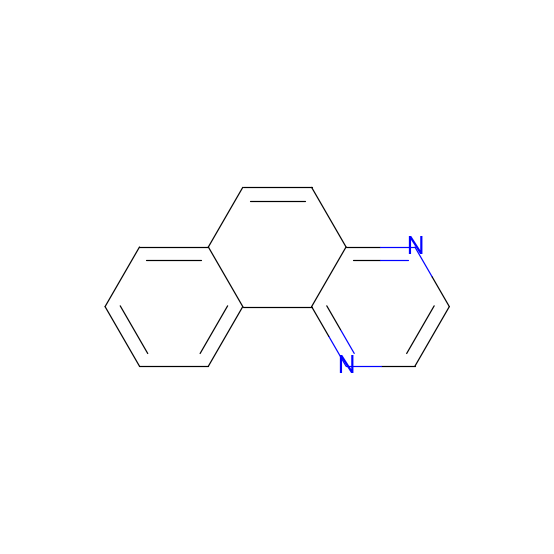

In [39]:
mol = Chem.MolFromSmiles(sol.iloc[0]['SMILES'])
fig = Draw.MolToMPL(mol)
plt.axis('off')
plt.show()

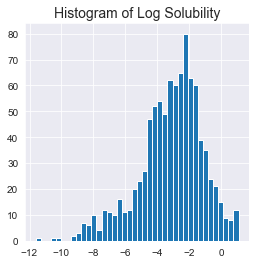

In [3]:
y = sol['LogS.M.']
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(y, bins=40)
ax.set_title("Histogram of Log Solubility", fontsize=14);

In [ ]:
columns

In [4]:
np.set_printoptions(threshold=np.inf)
X = sol.iloc[:,5:-1] # getting the relevant data
col_labels = sol.columns[5:-1]
X = X.to_numpy()
N, p = X.shape
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

(932, 2255)
(932,)


In [1]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)
plt.scatter(y_test, predictions)
plt.show()
print(mean_squared_error(y_test,predictions))

reg = linear_model.Ridge(alpha=.2)
reg.fit(X_train,y_train)
ridgePred = reg.predict(X_test)
plt.scatter(y_test, ridgePred)
plt.show()
print(mean_squared_error(y_test,ridgePred))

las = linear_model.Lasso(alpha=0.3)
las.fit(X_train,y_train) 
lasPred = las.predict(X_test)
plt.scatter(y_test,lasPred)
plt.show()
print(mean_squared_error(y_test,lasPred))

NameError: name 'LinearRegression' is not defined

In [ ]:
# setting font sizeto 30
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10, 10))

ridge_values = []
lasso_values = []
no_of_feat_ridge = []
no_of_feat_lasso = []

X_axis = np.arange(0.01,1.0,0.01)

for i in X_axis:
    reg = linear_model.Ridge(alpha=i)
    reg.fit(X_train,y_train)
    ridgePredict = reg.predict(X_test)
    ridge_values.append(np.sqrt(mean_squared_error(y_test,ridgePredict)))
    no_of_feat_ridge.append(reg.coef_[reg.coef_!=0].shape[0])
    las = linear_model.Lasso(alpha=i,tol=0.1)
    las.fit(X_train,y_train)
    lassoPred = las.predict(X_test)
    no_of_feat_lasso.append(las.coef_[las.coef_!=0].shape[0])
    lasso_values.append(np.sqrt(mean_squared_error(y_test,lassoPred)))


#Plotting both the curves simultaneously
plt.plot(X_axis,lasso_values, color='r', label='lasso')
plt.plot(X_axis,ridge_values, color='g', label='ridge')
plt.xlabel("RMSE")
plt.ylabel("Alpha")
plt.legend()
plt.show()
plt.figure(figsize=(10, 10))
plt.plot(X_axis,no_of_feat_lasso, color='m', label='features_lasso')
plt.plot(X_axis,no_of_feat_ridge, color='b', label='features_ridge')
plt.xlabel("Number of Features")
plt.ylabel("Alpha")
plt.legend()
plt.show()
print('Lasso' + ' ' + str(np.amin(no_of_feat_lasso)) + ' ' + str(np.amax(no_of_feat_lasso)))
print('Ridge' + ' ' + str(np.amin(no_of_feat_ridge)) + ' ' + str(np.amax(no_of_feat_ridge)))

In [18]:
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import f_regression

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
features = {}
for i in range(len(fs.scores_)):
    features[i] = fs.scores_[i]
#what are scores for the features
for i in dict(sorted(features.items(), key=lambda x:x[1], reverse=True)):
    print('Feature %s: %f' % (sol.columns[i], features[i]))
    


C:\Users\tosin\miniconda3\envs\COMP3200\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Feature P_VSA_m_3: 1129.564566
Feature P_VSA_e_4: 1128.223227
Feature JGI10: 592.280521
Feature nCrs: 522.743533
Feature SpAbs_B(s): 479.144152
Feature EE_B(p): 444.103374
Feature SM1_B(p): 443.175005
Feature SpAD_B(m): 441.762621
Feature VR2_Dz(e): 441.106386
Feature WiA_B(m): 438.991443
Feature JGT: 438.760725
Feature SpDiam_B(p): 428.536807
Feature VR1_B(s): 427.511815
Feature SpMAD_B(p): 423.518840
Feature Ho_B(p): 412.128197
Feature SpDiam_B(m): 411.818550
Feature SpMax1_Bh(m): 402.889196
Feature SpMaxA_B(p): 402.374620
Feature nF: 395.357819
Feature CATS2D_09_NL: 392.409662
Feature VR3_B(e): 390.067973
Feature SM1_B(v): 386.791494
Feature P_VSA_MR_7: 386.791358
Feature SdS: 386.702711
Feature nO: 386.061671
Feature VE3_B(s): 383.966679
Feature P_VSA_v_2: 383.780540
Feature nC: 383.753237
Feature NdS: 383.753237
Feature VR2_B(s): 382.852073
Feature CATS2D_07_NL: 379.857554
Feature EE_B(v): 375.873669
Feature Chi_B(m): 371.639134
Feature CATS2D_08_NL: 369.690078
Feature SM07_AEA(ri

Index(['MW', 'Mi', 'piPC10', 'X2v', 'X3v', 'VE1_Dt', 'VE3_Dt', 'SM1_Dz(Z)',
       'SM1_Dz(m)', 'SM1_Dz(v)', 'HyWi_B(m)', 'SpMax_B(m)', 'SpDiam_B(m)',
       'SpAD_B(m)', 'EE_B(m)', 'SM2_B(m)', 'SM3_B(m)', 'SM4_B(m)', 'SM5_B(m)',
       'SM6_B(m)', 'SpPosA_B(p)', 'SpMax_B(p)', 'SpDiam_B(p)', 'SM1_B(p)',
       'SM3_B(p)', 'SM5_B(p)', 'SM6_B(p)', 'SpPosA_B(i)', 'SM6_B(i)',
       'SpMaxA_B(s)', 'SpDiam_B(s)', 'ATS7m', 'ATS2p', 'ATSC4p', 'MATS1m',
       'MATS2m', 'MATS1v', 'MATS1e', 'MATS2e', 'MATS3e', 'MATS2s', 'GATS2m',
       'GATS3m', 'GATS1v', 'GATS2e', 'GATS1p', 'GATS2s', 'GGI4', 'JGI7',
       'SpMax1_Bh(m)', 'SpMax2_Bh(m)', 'SpMax3_Bh(m)', 'SpMax4_Bh(m)',
       'SpMax1_Bh(p)', 'SpMax2_Bh(p)', 'SpMax3_Bh(s)', 'SpMin1_Bh(e)',
       'P_VSA_MR_6', 'P_VSA_v_3', 'P_VSA_p_3', 'P_VSA_s_3', 'Eta_alpha',
       'Eta_F', 'Eta_F_A', 'Eta_sh_y', 'SpMaxA_EA', 'SpDiam_AEA(dm)',
       'SpMAD_AEA(dm)', 'SM04_EA(bo)', 'SM05_EA(bo)', 'SM06_EA(bo)',
       'SM12_AEA(ri)', 'Eig02_EA(bo)', 'Eig02_

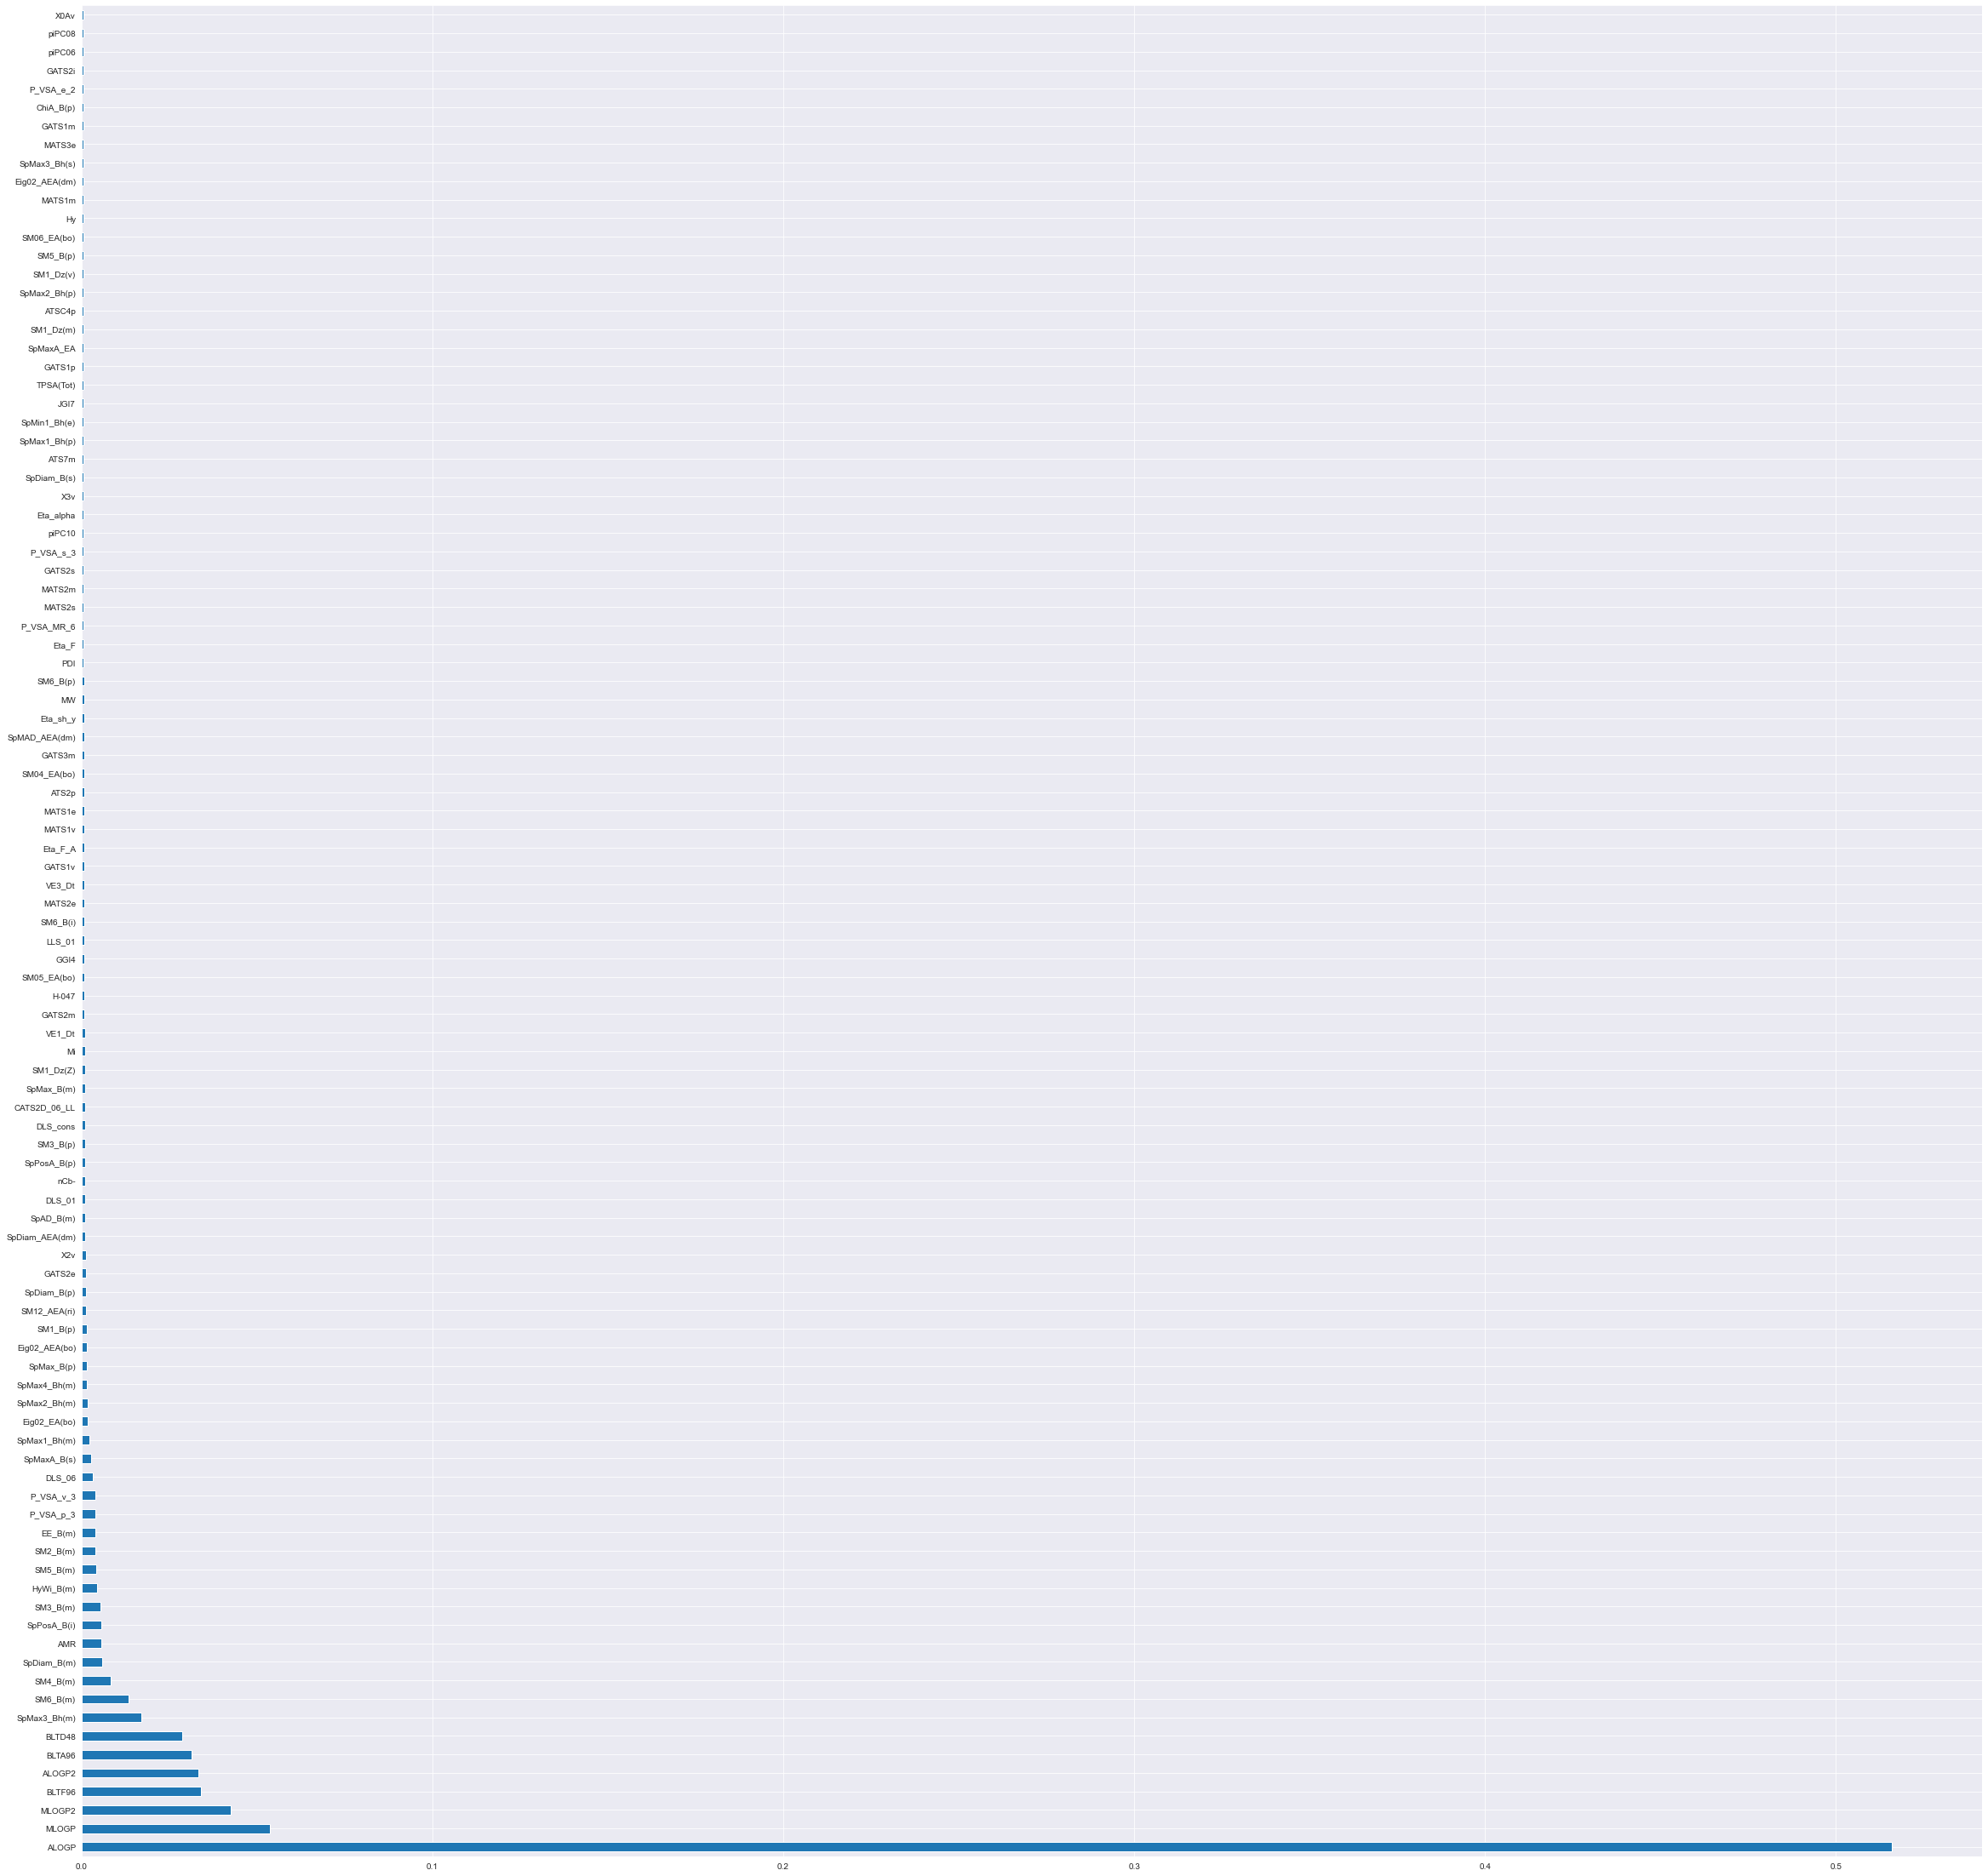

auto


In [23]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 500))
sel.fit(X_train, y_train)
selected_feat= sol.columns[5:-1][(sel.get_support())]
len(selected_feat)
print(selected_feat)
plt.figure(figsize=(40, 40))
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(sel.estimator_.feature_importances_, index = sol.columns[5:-1])
feat_importances.nlargest(100).plot(kind='barh')
plt.show()
print(sel.estimator_.max_features)

Index(['Mp', 'Mi', 'D/Dtr06', 'D/Dtr10', 'ZM1Mad', 'piPC08', 'piPC10', 'X0Av',
       'X3sol', 'VE1_Dt', 'VE3_Dt', 'SM1_Dz(Z)', 'SM1_Dz(v)', 'VE1_Dz(p)',
       'HyWi_B(m)', 'SpMax_B(m)', 'SpDiam_B(m)', 'SpAD_B(m)', 'SpMAD_B(m)',
       'EE_B(m)', 'SM2_B(m)', 'SM3_B(m)', 'SM4_B(m)', 'SM5_B(m)', 'SM6_B(m)',
       'ChiA_B(e)', 'SpPosA_B(p)', 'SpMax_B(p)', 'SM1_B(p)', 'SM3_B(p)',
       'SM6_B(p)', 'SpPosA_B(i)', 'SM6_B(i)', 'SpMaxA_B(s)', 'SpDiam_B(s)',
       'ATS8m', 'ATSC4p', 'MATS1v', 'MATS1e', 'MATS2e', 'MATS3e', 'MATS2s',
       'GATS1m', 'GATS1v', 'GATS2e', 'GATS7p', 'GATS1s', 'GATS2s', 'GGI4',
       'SpMax1_Bh(m)', 'SpMax2_Bh(m)', 'SpMax3_Bh(m)', 'SpMax4_Bh(m)',
       'SpMax1_Bh(p)', 'SpMin1_Bh(p)', 'P_VSA_MR_6', 'P_VSA_v_3', 'P_VSA_e_2',
       'P_VSA_p_3', 'P_VSA_s_3', 'Eta_F', 'Eta_F_A', 'Eta_FL', 'SpMaxA_EA(ri)',
       'SpMaxA_AEA(dm)', 'SpDiam_AEA(dm)', 'SM05_EA(bo)', 'SM12_AEA(ri)',
       'SM13_AEA(ri)', 'Eig02_EA(bo)', 'Eig02_AEA(bo)', 'Eig02_AEA(dm)',
       'nCb-', 

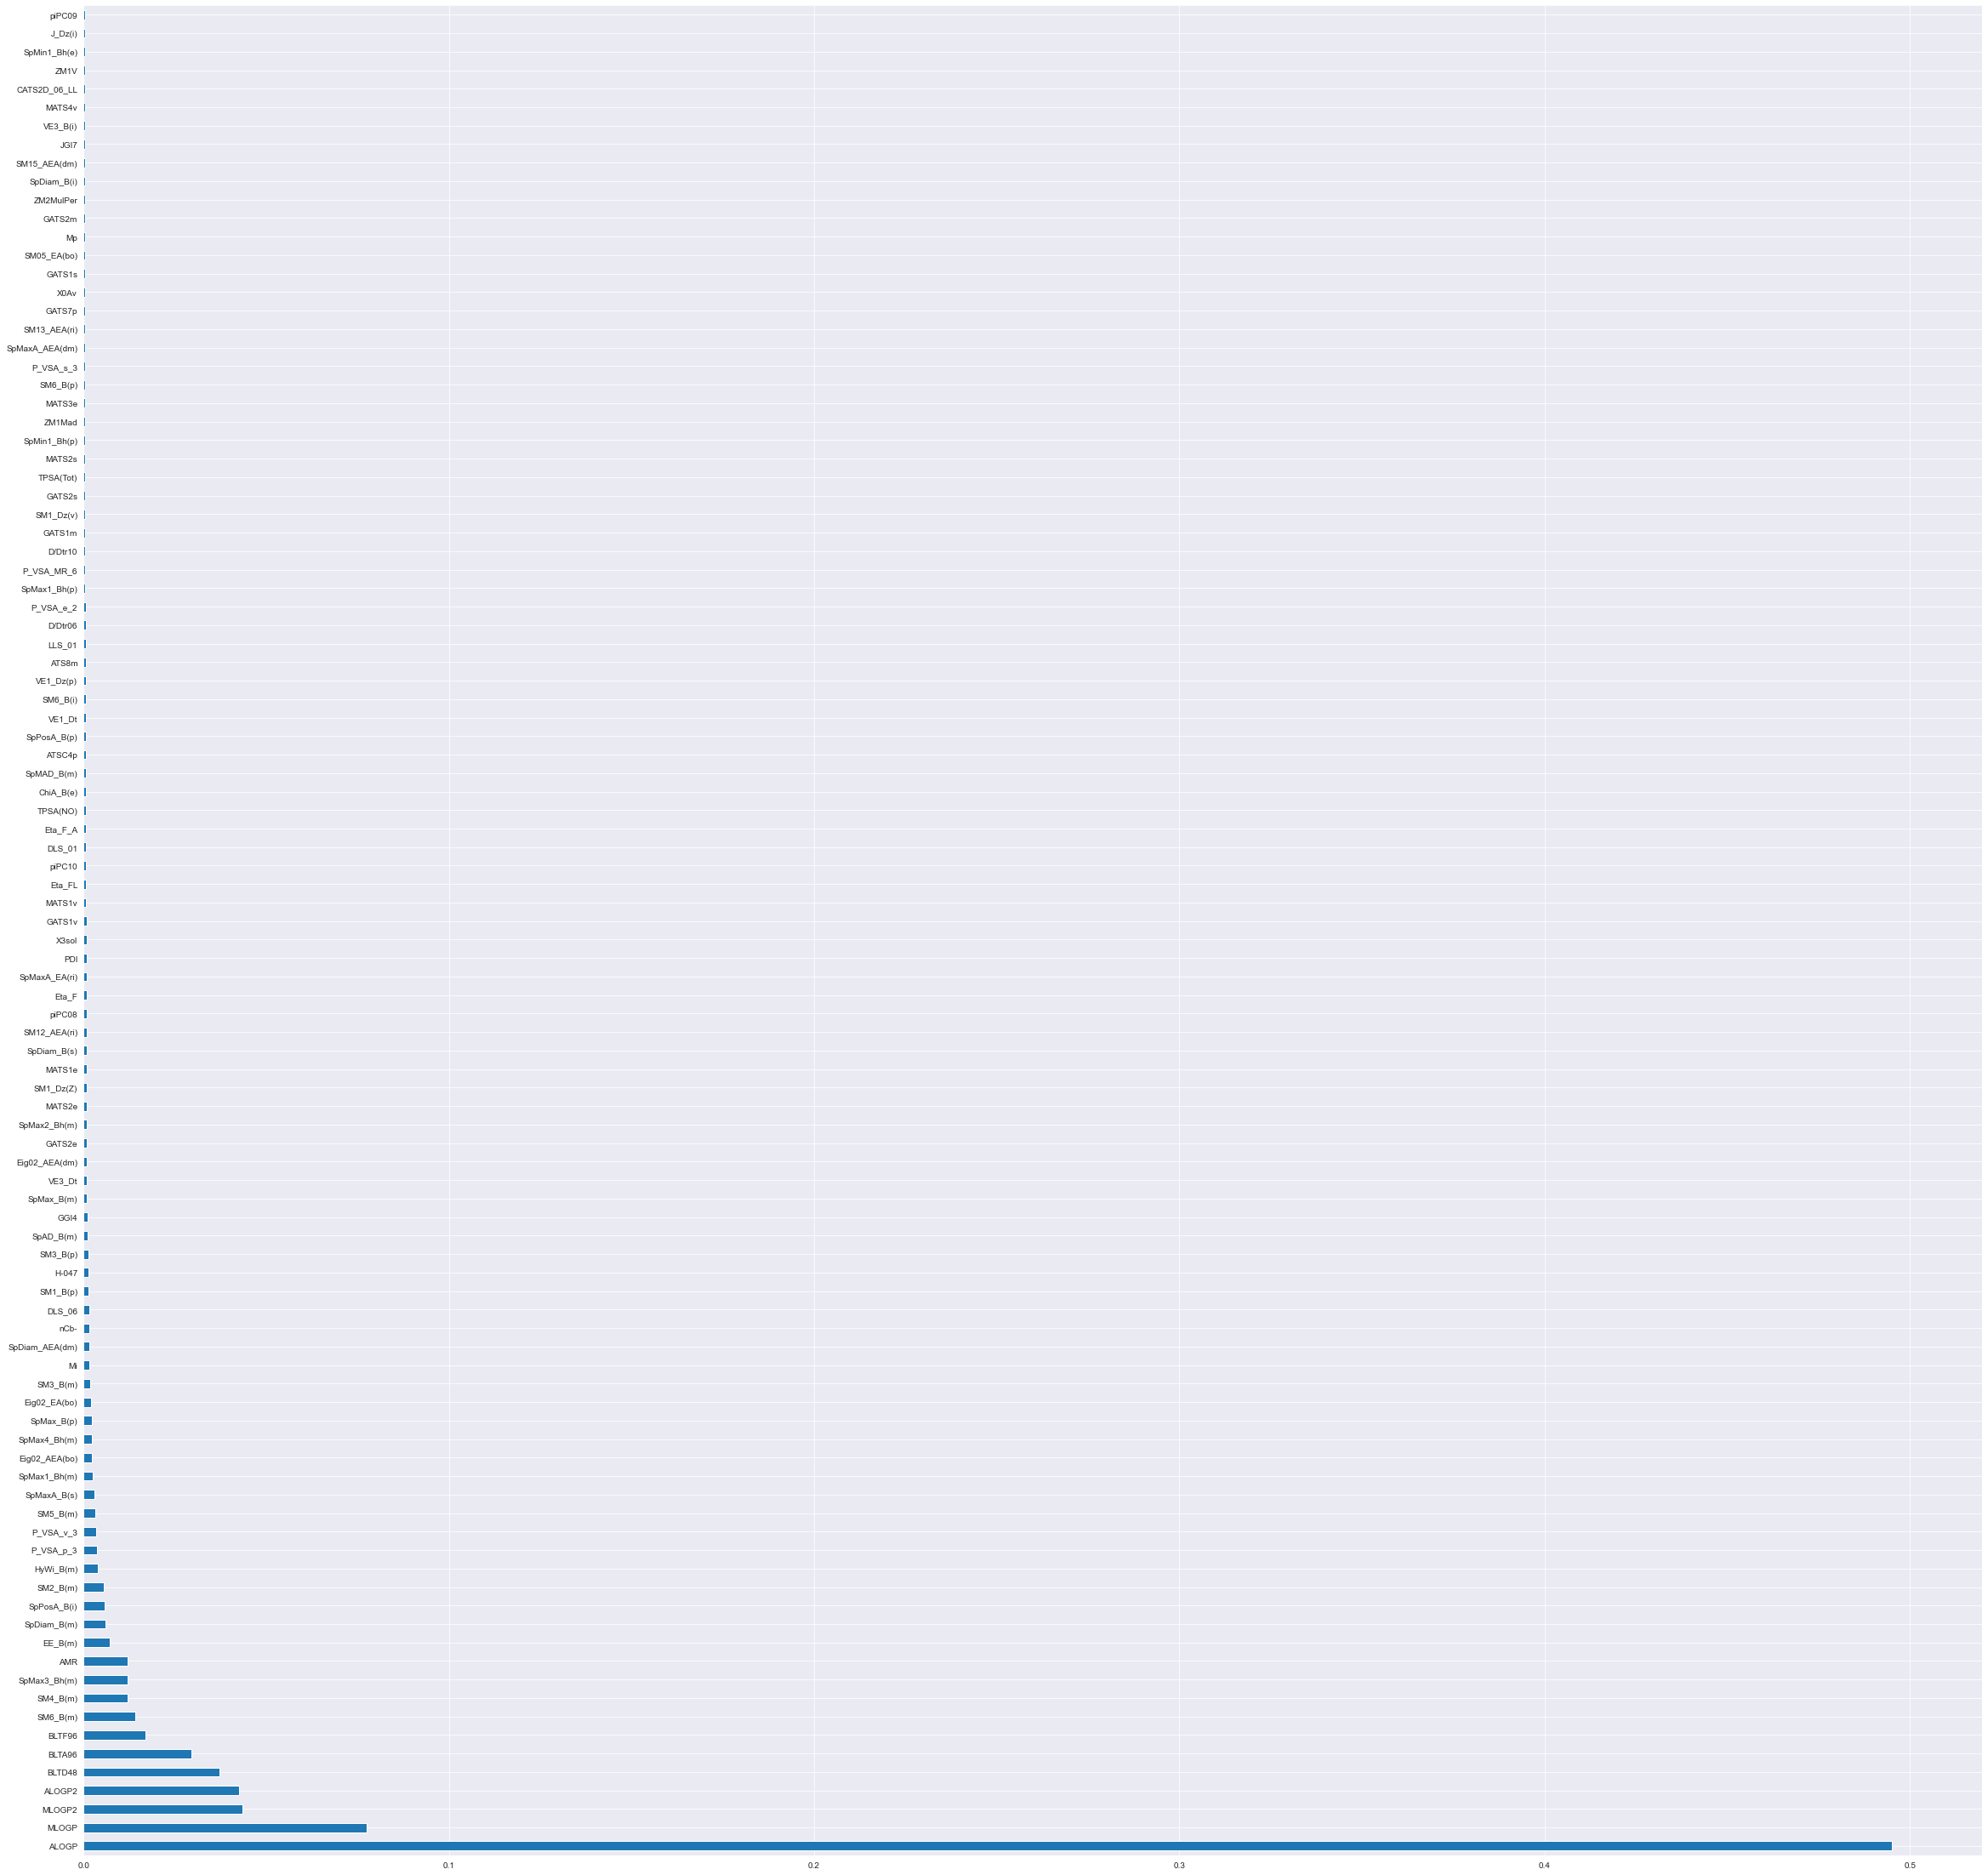

In [20]:
sel = SelectFromModel(RandomForestRegressor(n_estimators=100))
sel.fit(X_train, y_train)
selected_feat = sol.columns[5:-1][(sel.get_support())]
len(selected_feat)
print(selected_feat)
plt.figure(figsize=(40, 40))
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(sel.estimator_.feature_importances_, index=sol.columns[5:-1])
feat_importances.nlargest(100).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X,y)
rf_random.best_params_

In [ ]:
from sklearn.feature_selection import RFECV
lin_reg = LinearRegression()
rfecv = RFECV(estimator=lin_reg, scoring='neg_mean_squared_error')
rfecv.fit(X, y)
rfecv.support_ # check out which features were selected
#print(sorted(sklearn.metrics.SCORERS.keys()))

# Clustering using RDKit

## Generating molecules from smiles and storing them with the husskonen id

In [47]:
# Create molecules from SMILES and store in array
compounds = []
# .itertuples() returns a (index, column1, column2, ...) tuple per row
# we don't need index so we use _ instead
# note how we are slicing the dataframe to only the two columns we need now
for _, chembl_id, smiles in sol[["Compound_Identifier", "SMILES"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles), chembl_id))
compounds = [tup for tup in compounds if tup[1] != None and tup[0] != None]

# Create fingerprints for all molecules
rdkit_gen = rdFingerprintGenerator.GetRDKitFPGenerator(5)
fingerprints = [rdkit_gen.GetFingerprint(mol) for mol, idx in compounds]
print(fingerprints[0])
# How many compounds/fingerprints do we have?
print("Number of compounds converted:", len(fingerprints))
print("Fingerprint length per compound:", len(fingerprints[0]))


Number of compounds converted: 918
Fingerprint length per compound: 2048


## Calculating the distance between molecules in the dataset which is going to be used to cluster the data

In [48]:
from rdkit import DataStructs
def tanimoto_distance_matrix(fp_list):
    """Calculate distance matrix for fingerprint list"""
    dissimilarity_matrix = []
    # Notice how we are deliberately skipping the first and last items in the list
    # because we don't need to compare them against themselves
    for i in range(1, len(fp_list)):
        print(fp_list[i])
        # Compare the current fingerprint against all the previous ones in the list
        similarities = DataStructs.BulkTanimotoSimilarity(fp_list[i], fp_list[:i])
        # Since we need a distance matrix, calculate 1-x for every element in similarity matrix
        dissimilarity_matrix.extend([1 - x for x in similarities])
    return dissimilarity_matrix

In [49]:
# Side note: That looked like a list and not a matrix.
# But it is a triangular similarity matrix in the form of a list
n = len(fingerprints)

# Calculate number of elements in triangular matrix via n*(n-1)/2
elem_triangular_matr = (n * (n - 1)) / 2
print(
    f"Elements in the triangular matrix ({elem_triangular_matr:.0f}) ==",
    f"tanimoto_distance_matrix(fingerprints) ({len(tanimoto_distance_matrix(fingerprints))})",
)

Elements in the triangular matrix (420903) == tanimoto_distance_matrix(fingerprints) (420903)


## Method to cluster the data based on their fingerprints

In [14]:
def cluster_fingerprints(fingerprints, cutoff=0.2):
    """Cluster fingerprints
    Parameters:
        fingerprints
        cutoff: threshold for the clustering
    """
    # Calculate Tanimoto distance matrix
    distance_matrix = tanimoto_distance_matrix(fingerprints)
    # Now cluster the data with the implemented Butina algorithm:
    clusters = Butina.ClusterData(distance_matrix, len(fingerprints), cutoff, isDistData=True)
    clusters = sorted(clusters, key=len, reverse=True)
    return clusters

In [46]:
# Run the clustering procedure for the dataset
print(fingerprints[0])
clusters = cluster_fingerprints(fingerprints, cutoff=0.45)
#print(clusters)

# Give a short report about the numbers of clusters and their sizes
num_clust_g1 = sum(1 for c in clusters if len(c) == 1)
num_clust_g5 = sum(1 for c in clusters if len(c) > 5)
num_clust_g25 = sum(1 for c in clusters if len(c) > 25)
num_clust_g100 = sum(1 for c in clusters if len(c) > 100)

print("total # clusters: ", len(clusters))
print("# clusters with only 1 compound: ", num_clust_g1)
print("# clusters with >5 compounds: ", num_clust_g5)
print("# clusters with >25 compounds: ", num_clust_g25)
print("# clusters with >100 compounds: ", num_clust_g100)

total # clusters:  454
# clusters with only 1 compound:  317
# clusters with >5 compounds:  23
# clusters with >25 compounds:  2
# clusters with >100 compounds:  0


## Cluster visualisation

Ten molecules from second largest cluster:


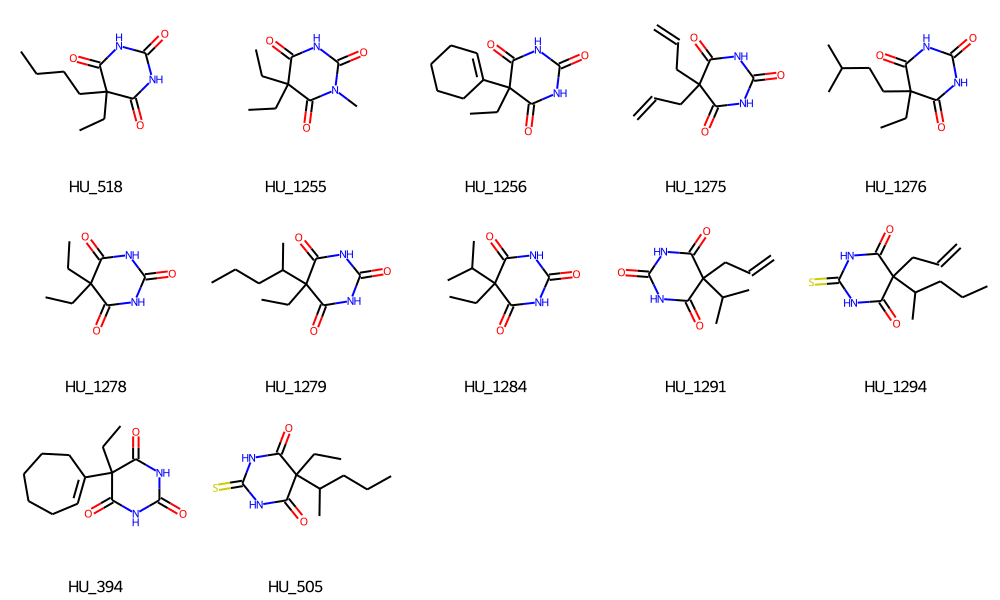

In [45]:
print("Ten molecules from second largest cluster:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds[i][0] for i in clusters[10][:20]],
    legends=[compounds[i][1] for i in clusters[1][:20]],
    molsPerRow=5,
)

In [41]:
zipped_list = [(2,10,15,14),(0,5),(6,)]
output_list = []
for i in range(0,len(zipped_list)):
    for nums in zipped_list[i]:
        output_list.insert(nums,i)
print(output_list)

[1, 0, 0, 0, 0, 1, 2]


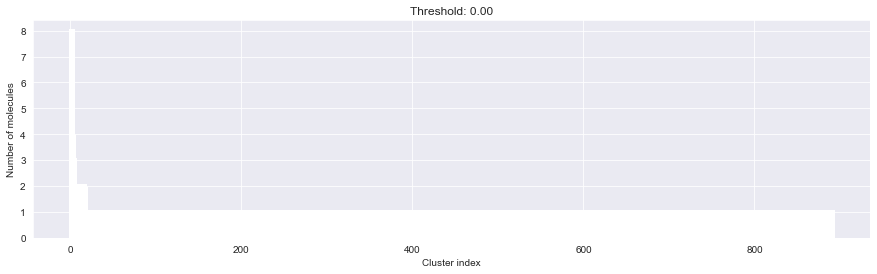

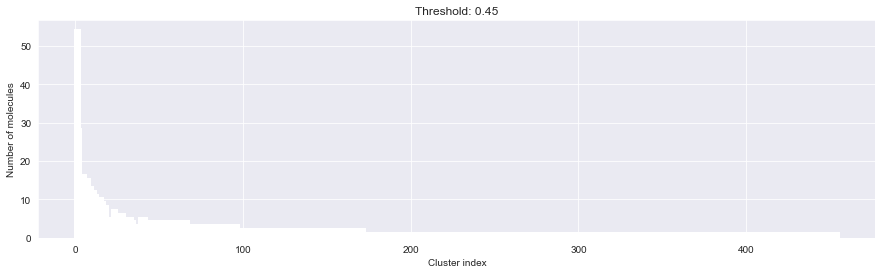

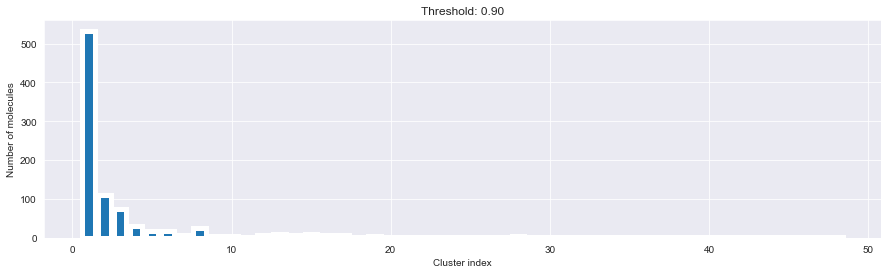

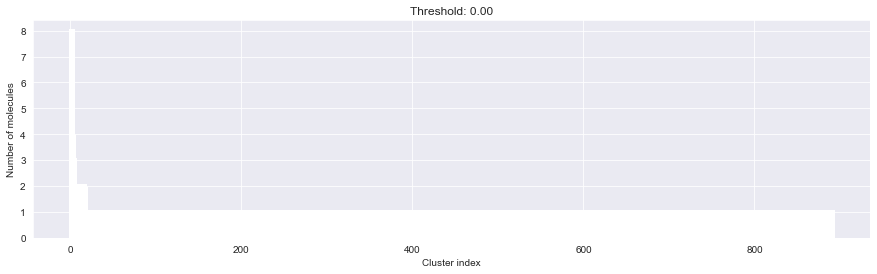

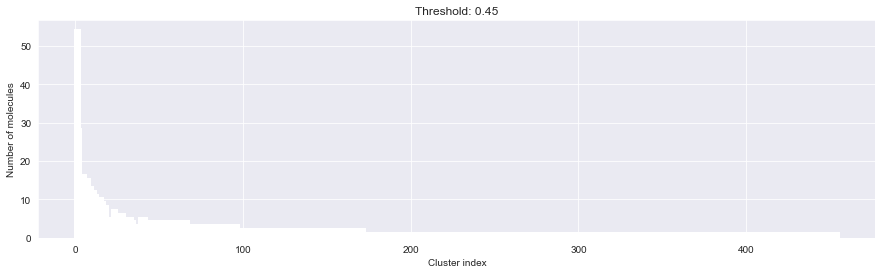

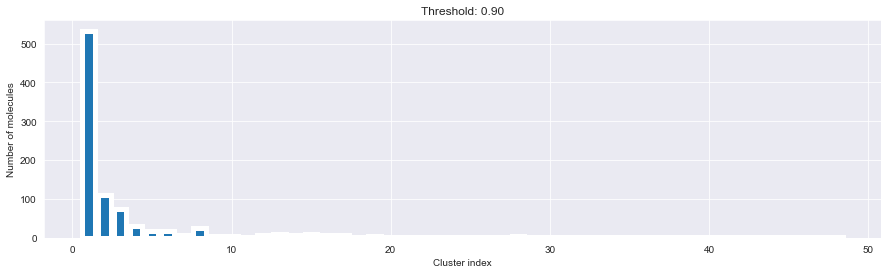

In [42]:
for cutoff in np.arange(0.0, 1.0, 0.45):
    clusters = cluster_fingerprints(fingerprints, cutoff=cutoff)
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.set_title(f"Threshold: {cutoff:3.2f}")
    ax.set_xlabel("Cluster index")
    ax.set_ylabel("Number of molecules")
    ax.bar(range(1, len(clusters) + 1), [len(c) for c in clusters], lw=5)
    display(fig)

Ten molecules from largest cluster:


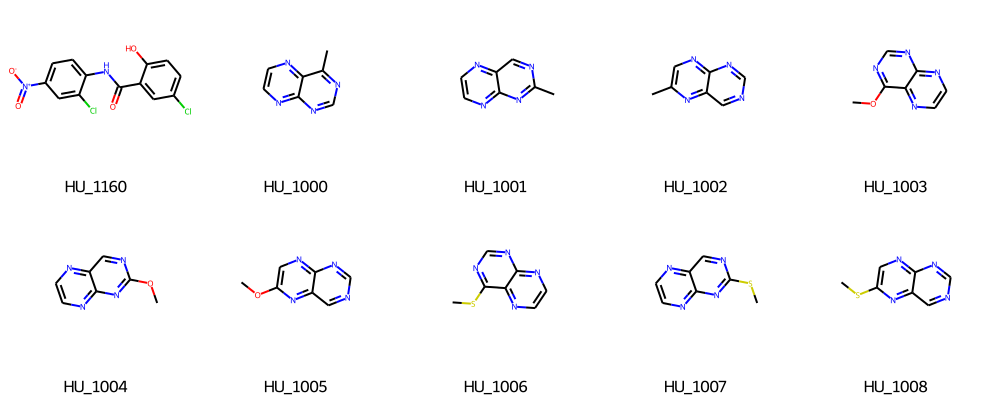

In [43]:
print("Ten molecules from largest cluster:")
# Draw molecules
Draw.MolsToGridImage(
    [compounds[i][0] for i in clusters[0][:10]],
    legends=[compounds[i][1] for i in clusters[0][:10]],
    molsPerRow=5,
)

## Clustering and visualisation using ChemPlot

In [ ]:
#get correlations of each features in dataset
corrmat = sol.iloc[:,4:-1].corr()
top_corr_features = corrmat.index
#plt.figure(figsize=(20,20))
#plot heat map
#g=sns.heatmap(sol[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# AQSolDB 
[Not affected by ridge regression as rmse is already relatively small,
It is also better as properties used have been narrowed down to use the ones shown to be more related to solubility
]

In [ ]:
solDB = pd.read_csv("C:/Users/tosin/OneDrive/Documents/Individual Project/AQSOLDB.csv")
print(solDB.shape)
print(solDB.columns)

In [ ]:
yDB = solDB["Solubility"].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(yDB, bins=40)
ax.set_title("Histogram of Log Solubility", fontsize=14);

In [ ]:
XDB = solDB[solDB.columns[7:-1]] # getting the relevant data
col_labels = solDB.columns[7:-1]
XDB = XDB.to_numpy()
N, p = XDB.shape
print(XDB.shape)
print(yDB.shape)
print(col_labels)

                           
X_train, X_test, y_train, y_test = train_test_split(XDB, yDB, test_size=0.3)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)
plt.scatter(y_test, predictions)
plt.show()
print(mean_squared_error(y_test,predictions))


regDB = linear_model.Ridge(alpha=0.2)
regDB.fit(X_train,y_train)
ridgeDBPred = regDB.predict(X_test)
plt.scatter(y_test, ridgeDBPred)
plt.show()
print(mean_squared_error(y_test,ridgeDBPred))


lasDB = linear_model.Lasso(alpha=0.1)
lasDB.fit(X_train,y_train)
lasDBPred = lasDB.predict(X_test)
plt.scatter(y_test,ridgeDBPred)
plt.show()


In [ ]:
ridgeDB_values = []
lassoDB_values = []
X_axis = np.arange(0.01,1.5,0.01)

for i in X_axis:
    regDB = linear_model.Ridge(alpha=i)
    regDB.fit(X_train,y_train)
    ridgePredict = regDB.predict(X_test)
    ridgeDB_values.append(np.sqrt(mean_squared_error(y_test,ridgePredict)))
    lasDB = linear_model.Lasso(alpha=i,tol=0.1)
    lasDB.fit(X_train,y_train)
    lassoPred = lasDB.predict(X_test)
    lassoDB_values.append(np.sqrt(mean_squared_error(y_test,lassoPred)))
    
    
# Plotting both the curves simultaneously
plt.plot(X_axis,lassoDB_values, color='r', label='lasso')
plt.plot(X_axis,ridgeDB_values, color='g', label='ridge')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("RMSE")
plt.ylabel("Alpha")
plt.title("Regularisation")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

In [ ]:
#get correlations of each features in dataset
corrmat = solDB.iloc[:,7:27].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(solDB[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Supplementary material

In [35]:
solAQ = pd.read_excel("C:/Users/tosin/OneDrive/Documents/Individual Project/Supplementary Material/Improved Prediction of Aqueous Solubility of Novel Compounds by Going Deeper With Deep Learning.xlsx", engine='openpyxl', verbose=False)
print(solAQ.shape)
print(solAQ.columns)

(9956, 6)
Index(['Compound ID', 'InChIKey', 'SMILES', 'logS', 'logP', 'MW'], dtype='object')


In [ ]:
yAQ = solAQ["logS"].values
print(yAQ[:3])


In [ ]:
XAQ = solAQ[solAQ.columns[4:]] # getting the relevant data
col_labels = solAQ.columns[4:]
XAQ = XAQ.to_numpy()
N, p = XAQ.shape
print(XAQ.shape)
print(yAQ.shape)
print(col_labels)

                           
X_train, X_test, y_train, y_test = train_test_split(XAQ, yAQ, test_size=0.3)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)
plt.scatter(y_test, predictions)
print(mean_squared_error(y_test,predictions))

# Multi-channel GCN dataset.csv

In [30]:
solRE = pd.read_csv("C:/Users/tosin/OneDrive/Documents/Individual Project/Multi-channel GCN dataset.csv")
print(solRE.shape)
print(solRE.columns)
#findMean = solRE.mean
solRE.dropna(inplace = True)

(11696, 26)
Index(['Name', 'SMILES', 'Experiment Reference', 'Datagroup', 'Temperature',
       'CAS Number', 'Experimental Solubility in Water', 'Standard InChIKey',
       'Molar Mass', 'Solvation Energy', 'Dipole Moment', 'Molecular Volume',
       'Molecular Surface Area', 'QXX', 'QYY', 'QZZ', 'HOMO', 'LUMO', 'gap',
       'Cal logP', 'Cal MR', 'TPSA', 'Labute ASA', 'Balaban J index',
       'Bertz CT index', 'Isomer'],
      dtype='object')


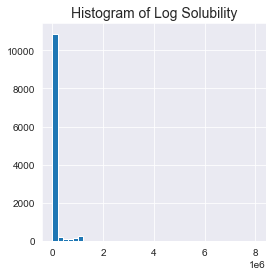

In [32]:
yRE = solRE["Experimental Solubility in Water"].values
fig, ax = plt.subplots(figsize=(4,4))
ax.hist(yRE, bins=40)
ax.set_title("Histogram of Log Solubility", fontsize=14);

(11695, 18)
(11695,)
Index(['Molar Mass', 'Solvation Energy', 'Dipole Moment', 'Molecular Volume',
       'Molecular Surface Area', 'QXX', 'QYY', 'QZZ', 'HOMO', 'LUMO', 'gap',
       'Cal logP', 'Cal MR', 'TPSA', 'Labute ASA', 'Balaban J index',
       'Bertz CT index', 'Isomer'],
      dtype='object')
62068053293.992874
[ 2.70817683e+02  3.41313072e+02 -9.47501319e+01  1.37435749e+03
 -1.16337443e+03  2.17793665e+11  2.17793666e+11  2.17793665e+11
 -1.00927937e+11  1.00927974e+11 -1.00927929e+11 -3.04635235e+04
  2.09244850e+03  1.45028964e+02 -1.32601993e+03  1.21269638e+04
  3.06795652e+01  5.24263372e+01]


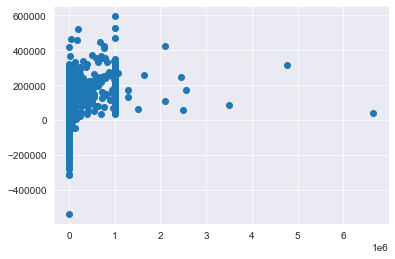

In [33]:
XRE = solRE[solRE.columns[8:]] # getting the relevant data
col_labels = solRE.columns[8:]
XRE = XRE.to_numpy()
N, p = XRE.shape
print(XRE.shape)
print(yRE.shape)
print(col_labels)
                           
X_train, X_test, y_train, y_test = train_test_split(XRE, yRE, test_size=0.3)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
predictions = lin_reg.predict(X_test)
plt.scatter(y_test, predictions)
print(mean_squared_error(y_test,predictions))
print(lin_reg.coef_)

In [34]:
from sklearn.feature_selection import RFECV
lin_reg = LinearRegression()
rfecv = RFECV(estimator=lin_reg, scoring='neg_mean_squared_error')
rfecv.fit(XRE, yRE)
rfecv.support_ # check out which features were selected

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False])

In [ ]:
Smiles = np.concatenate([sol['SMILES'],solDB['SMILES'],solAQ['SMILES'],solRE['SMILES']])
print(Smiles.shape)
print(Smiles)


# 